# Task 2: MLP mit Hidden Layer und Backpropagation

Erweiterung zu einem Multi-Layer Perceptron mit einem Hidden Layer (5 Neuronen).

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.mlp_one_hidden import MLPOneHiddenLayer
from src.visualization import plot_training_curve, plot_decision_regions

In [2]:
data = np.load("../data/spiral_dataset.npz")
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (210, 2), Test: (90, 2)


## Test: Ein Gradient-Schritt reduziert Loss

In [3]:
model = MLPOneHiddenLayer(hidden_dim=5, lr=0.1)
model.reset_weights()

Xb, yb = X_train[:64], y_train[:64]
activations, y_hat_before = model.forward(Xb)
loss_before = 0.5 * np.mean((y_hat_before - yb) ** 2)

grads = model.backward(yb, activations)
model.gradient_step(grads)

_, y_hat_after = model.forward(Xb)
loss_after = 0.5 * np.mean((y_hat_after - yb) ** 2)

print(f"Loss before: {loss_before:.6f}")
print(f"Loss after:  {loss_after:.6f}")
print("Passed" if loss_after < loss_before else "Failed")

Loss before: 0.124999
Loss after:  0.124588
Passed


## Training

In [5]:
model = MLPOneHiddenLayer(hidden_dim=5, lr=0.1, epochs=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = (y_pred == np.argmax(y_test, axis=1)).mean()
print(f"Test Accuracy: {acc:.3f}")
print("Passed (>= 90%)" if acc >= 0.90 else "Failed (< 90%)")

Test Accuracy: 0.933
Passed (>= 90%)


## Lernkurve

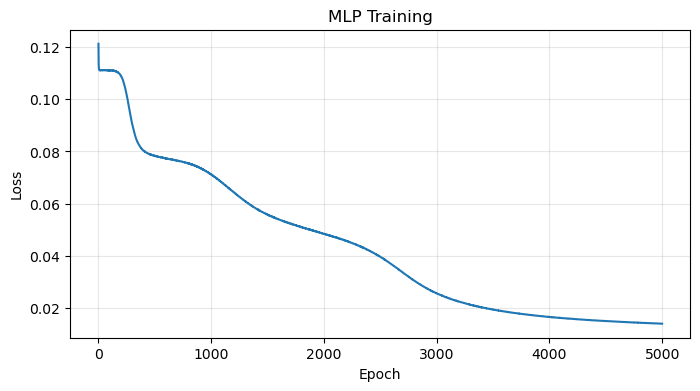

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(model.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('MLP Training')
plt.grid(alpha=0.3)
plt.show()

## Entscheidungsregionen

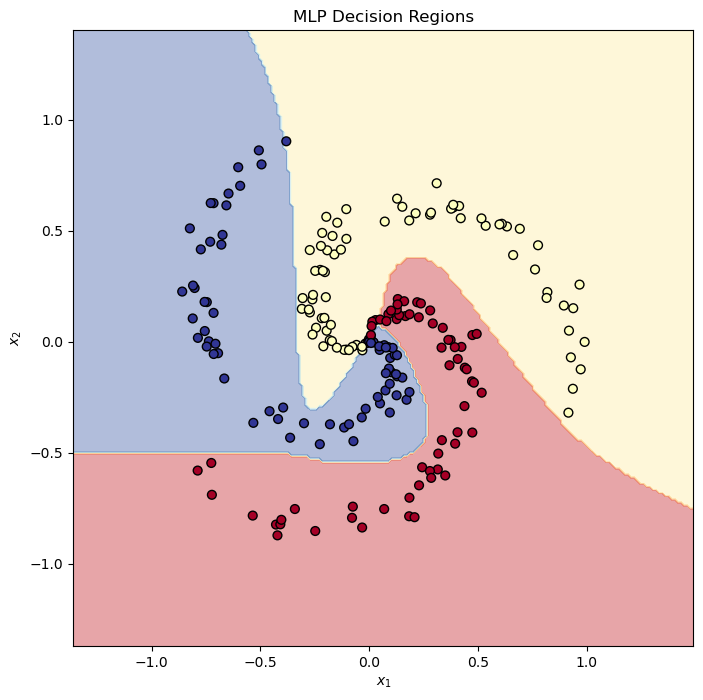

In [9]:
import os
os.makedirs('../results', exist_ok=True)
plot_decision_regions(model, X_train, y_train, '../results/task2_decision_regions.pdf')

margin = 0.5
x_min, x_max = X_train[:, 0].min() - margin, X_train[:, 0].max() + margin
y_min, y_max = X_train[:, 1].min() - margin, X_train[:, 1].max() + margin
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
plt.scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(y_train, axis=1), cmap='RdYlBu', edgecolor='k', s=40)
plt.title('MLP Decision Regions')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## Vergleich: SimpleNN vs MLP

In [8]:
from src.simple_nn import SimpleNeuralNetwork

simple_model = SimpleNeuralNetwork(epochs=500)
simple_model.fit(X_train, y_train)
simple_acc = (simple_model.predict(X_test) == np.argmax(y_test, axis=1)).mean()

print(f"SimpleNN Accuracy: {simple_acc:.3f}")
print(f"MLP Accuracy:      {acc:.3f}")

SimpleNN Accuracy: 0.544
MLP Accuracy:      0.933
